<a href="https://colab.research.google.com/github/decile-team/submodlib/blob/master/tutorials/Modelling_Capabilities_of_CMI_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Init

In [1]:
!pip install -i https://test.pypi.org/simple/ --extra-index-url https://pypi.org/simple/ submodlib

Looking in indexes: https://test.pypi.org/simple/, https://pypi.org/simple/
     |████████████████████████████████| 79 kB 4.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for submodlib: filename=submodlib-1.1.2-cp37-cp37m-linux_x86_64.whl size=491418 sha256=225cd06a57bd7569d4e0d1e18acc5a31d9ba5fbcbaba6c0f033914cc50209b66
  Stored in directory: /root/.cache/pip/wheels/51/db/2f/0d54fe93a7db2761f759121f23afe30dd9511994695fba8c4e
Successfully built submodlib


# Hand-crafted Data with Queries and Privates

To carefully observe the characteristics of the optimal set obtained by the maximization of these functions, we begin by creating a controlled dataset of 46 2D points along with some query points as below. Specifically we have some clusters and some outliers in this dataset. Please note that there is no overlap between the ground set and the query set.

Number of elements in ground set =  46


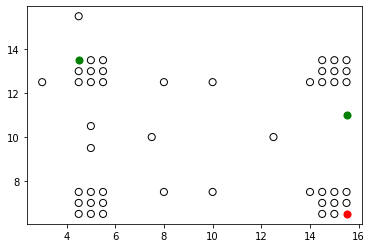

In [2]:
import numpy as np
import matplotlib.pyplot as plt
groundData =np.array( [(3,12.5), (5,13.5), (5.5,13.5), (14.5,13.5), (15,13.5), (15.5,13.5),
(4.5,13), (5,13), (5.5,13), (14.5,13), (15,13), (15.5,13),
(4.5,12.5), (5,12.5), (5.5,12.5), (14.5,12.5), (15,12.5), (15.5,12.5),
(4.5,7.5), (5,7.5), (5.5,7.5), (14.5,7.5), (15,7.5), (15.5,7.5),
(4.5,7), (5,7), (5.5,7), (14.5,7), (15,7), (15.5,7),
(4.5,6.5), (5,6.5), (5.5,6.5), (14.5,6.5), (15,6.5), (7.5,10), (12.5,10), (10,12.5), 
(10,7.5), (8,12.5), (8,7.5), (14,12.5), (14,7.5), (4.5, 15.5), (5,9.5), (5,10.5)] )
print("Number of elements in ground set = ", len(groundData))
groundxs = [x[0] for x in groundData]
groundys = [x[1] for x in groundData]

mutlipleQueryData = np.array([(4.5,13.5), (15.5,11)])
multiplequeryxs = [x[0] for x in mutlipleQueryData]
multiplequeryys = [x[1] for x in mutlipleQueryData]

singlePrivateData = np.array([(15.5,6.5)])
singleprivatexs = [x[0] for x in singlePrivateData]
singleprivateys = [x[1] for x in singlePrivateData]

plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
plt.scatter(multiplequeryxs, multiplequeryys, s=50, color='green', label="Queries")
plt.scatter(singleprivatexs, singleprivateys, s=50, color='red', label="Privates")

In [3]:
def printGreedyRounded(greedyList):
  print([(elem[0], round(elem[1],3)) for elem in greedyList])

# Selection by FacilityLocationConditionalMutualInformation (FLCMI)

[(7, 6.666), (41, 3.266), (43, 0.088), (0, 0.049), (45, 0.0), (44, 0.0), (42, 0.0), (40, 0.0), (39, 0.0), (38, 0.0)]
[(7, 6.545), (41, 2.77), (43, 0.088), (0, 0.049), (45, 0.0), (44, 0.0), (42, 0.0), (40, 0.0), (39, 0.0), (38, 0.0)]
[(7, 6.432), (16, 2.368), (43, 0.088), (0, 0.049), (45, 0.0), (44, 0.0), (42, 0.0), (41, 0.0), (40, 0.0), (39, 0.0)]
[(7, 8.122), (16, 6.468), (13, 0.689), (43, 0.456), (0, 0.444), (8, 0.376), (36, 0.283), (45, 0.26), (12, 0.221), (6, 0.221)]
[(7, 7.988), (16, 6.001), (13, 0.687), (43, 0.456), (0, 0.444), (8, 0.376), (45, 0.268), (36, 0.23), (12, 0.221), (6, 0.221)]
[(7, 7.875), (16, 5.605), (13, 0.678), (43, 0.456), (0, 0.444), (8, 0.376), (45, 0.26), (12, 0.221), (6, 0.221), (2, 0.221)]
[(7, 8.122), (10, 7.142), (45, 1.38), (43, 0.721), (41, 0.65), (0, 0.643), (36, 0.474), (8, 0.435), (11, 0.374), (13, 0.298)]
[(7, 7.988), (10, 6.704), (45, 1.378), (43, 0.721), (0, 0.643), (41, 0.592), (8, 0.435), (36, 0.42), (11, 0.374), (13, 0.298)]
[(7, 7.875), (10, 6.

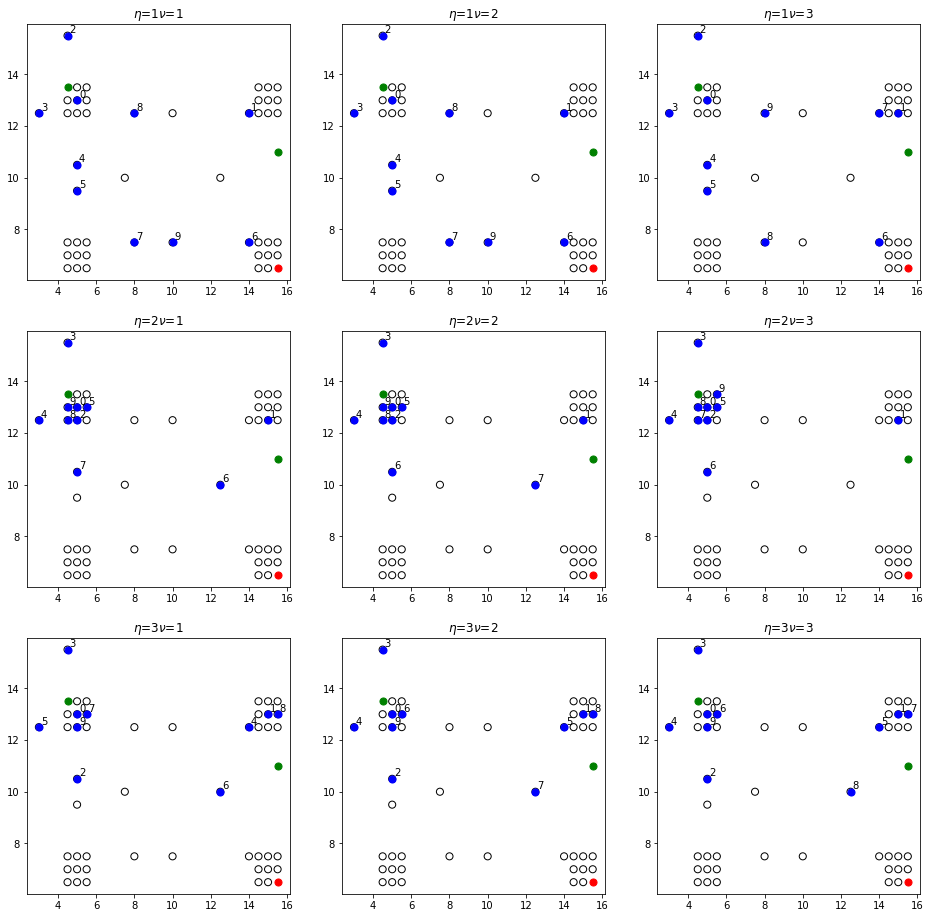

In [5]:
from submodlib import FacilityLocationConditionalMutualInformationFunction
etas = [1, 2, 3]
nus = [1, 2, 3]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for eta in etas:
    for nu in nus:
        plt.subplot(3,3,row*3+index)
        obj = FacilityLocationConditionalMutualInformationFunction(n=46, 
                                                                   num_queries=2, 
                                                                   num_privates=1, 
                                                                   data=groundData, 
                                                                   queryData=mutlipleQueryData, 
                                                                   privateData=singlePrivateData,  
                                                                   metric="euclidean",
                                                                  magnificationEta=eta,
                                                                  privacyHardness=nu)
        greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
        printGreedyRounded(greedyList)
        greedyXs = [groundxs[x[0]] for x in greedyList]
        greedyYs = [groundys[x[0]] for x in greedyList]
        plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
        plt.scatter(multiplequeryxs, multiplequeryys, s=50, color='green', label="Queries")
        plt.scatter(singleprivatexs, singleprivateys, s=50, color='red', label="Privates")
        plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
        for label, element in enumerate(greedyList):
            plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
        plt.title('$\eta$='+str(eta)+'$\\nu$='+str(nu))
        index += 1
        if index == 4:
            row += 1
            index = 1

# Selection by LogDeterminantConditionalMutualInformation (LogDetCMI)

[(1, 0.164), (6, 0.09), (17, 0.057), (7, 0.027), (16, 0.023), (2, 0.012), (12, 0.01), (15, 0.01), (43, 0.008), (0, 0.006)]
[(1, 0.164), (6, 0.09), (17, 0.056), (7, 0.027), (16, 0.023), (2, 0.012), (12, 0.01), (15, 0.01), (43, 0.008), (0, 0.006)]
[(1, 0.164), (6, 0.09), (17, 0.056), (7, 0.027), (16, 0.022), (23, 0.015), (42, 0.735), (36, 0.75), (15, 0.211), (40, 0.157)]
[(1, 0.933), (6, 1.349), (7, 1.659), (14, 1.05), (17, 0.253), (45, 0.241), (16, 0.118), (39, 0.104), (15, 0.057), (44, 0.031)]
[(1, 0.933), (6, 1.349), (7, 1.659), (14, 1.05), (17, 0.252), (45, 0.241), (16, 0.118), (39, 0.105), (15, 0.057), (23, 0.046)]
[(1, 0.933), (6, 1.349), (7, 1.66), (14, 1.051), (17, 0.252), (45, 0.241), (23, 0.177), (16, 0.157), (39, 0.11), (36, 0.088)]
[(2, 1.759), (43, 3.487), (17, 0.719), (18, 0.697), (37, 1.112), (26, 0.963), (24, 1.939), (21, 5.507), (-1, -1.7976931348623157e+308), (-1, -1.7976931348623157e+308)]
[(2, 1.759), (43, 3.488), (17, 0.717), (18, 0.698), (37, 1.117), (26, 0.973), (2

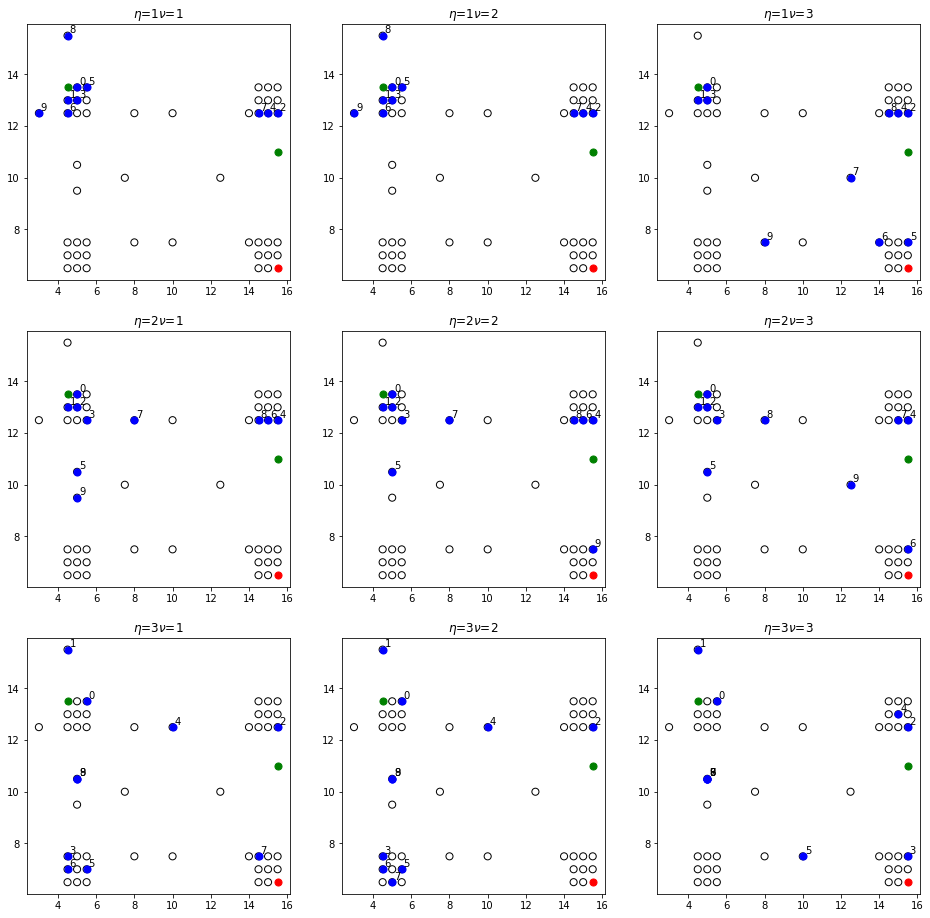

In [7]:
from submodlib import LogDeterminantConditionalMutualInformationFunction
etas = [1, 2, 3]
nus = [1, 2, 3]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for eta in etas:
    for nu in nus:
        plt.subplot(3,3,row*3+index)
        obj = LogDeterminantConditionalMutualInformationFunction(n=46, 
                                                                   num_queries=2, 
                                                                   num_privates=1, 
                                                                   data=groundData, 
                                                                   queryData=mutlipleQueryData, 
                                                                   privateData=singlePrivateData,  
                                                                   metric="euclidean",
                                                                  magnificationEta=eta,
                                                                  privacyHardness=nu, lambdaVal=1)
        greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
        printGreedyRounded(greedyList)
        greedyXs = [groundxs[x[0]] for x in greedyList]
        greedyYs = [groundys[x[0]] for x in greedyList]
        plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
        plt.scatter(multiplequeryxs, multiplequeryys, s=50, color='green', label="Queries")
        plt.scatter(singleprivatexs, singleprivateys, s=50, color='red', label="Privates")
        plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
        for label, element in enumerate(greedyList):
            plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
        plt.title('$\eta$='+str(eta)+'$\\nu$='+str(nu))
        index += 1
        if index == 4:
            row += 1
            index = 1

# Selection by SetCoverConditionalMutualInformation Function [SCCMI]

In [8]:
import numpy as np
import random
from submodlib import SetCoverConditionalMutualInformationFunction
num_concepts = 20
num_samples = 15
budget = 4
cover_set = []
np.random.seed(1)
random.seed(1)
#concept_weights = np.random.rand(num_concepts).tolist()
printables = []
for i in range(num_samples):
    cover_set.append(set(random.sample(list(range(num_concepts)), random.randint(0,num_concepts/2))))
    printable = ["\u25A1"]*num_concepts
    #print(''.join(map(str, temp)))
    for ind, val in enumerate(printable):
        if ind in cover_set[i]:
            printable[ind] = "\u25A0"
    #print(i, ": ", ''.join(map(str, printable)))
    printables.append(printable)
    #printable = ["\u25A0" if index in cover_set[i] for index, val in enumerate(temp)]
queries = set(random.sample(range(num_concepts),2))
set_concepts = set(range(num_concepts))
set_concepts_minus_queries = set_concepts - queries
privates = set(random.sample(set_concepts_minus_queries, 1))
print("Query set: ", queries)
print("Private set: ", privates)
obj = SetCoverConditionalMutualInformationFunction(n=num_samples, cover_set=cover_set, 
                                        num_concepts=num_concepts, query_concepts=queries, private_concepts=privates)
greedyList = obj.maximize(budget=budget, optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
greedyIndices = [x[0] for x in greedyList]
for i in range(num_samples):
    if i in greedyIndices:
        print(i, ": ", ''.join(map(str, printables[i])), f"({len(cover_set[i])})", "\u2713")
    else:
        print(i, ": ", ''.join(map(str, printables[i])), f"({len(cover_set[i])})")
print("Greedy Ordered List: ", greedyList)
greedyConcepts = set()
for elem in greedyIndices:
    greedyConcepts = greedyConcepts.union(cover_set[elem])
print("Concepts Covered by Greedy Set: ", greedyConcepts)
greedyPrintable = ["\u25A1"]*num_concepts
for ind, val in enumerate(greedyPrintable):
    if ind in greedyConcepts:
        greedyPrintable[ind] = "\u25A0"
print("Concepts Covered by Greedy Set: ", ''.join(map(str, greedyPrintable)))

Query set:  {0, 6}
Private set:  {19}
0 :  □□■□□□□□□□□□□□□□□□■□ (2)
1 :  □□□■□□□□□□□□□□■■□□■□ (4)
2 :  ■□□■□□■□□■□□■■■■□□■■ (10)
3 :  □□□□□□□□□□□□□□□□□□□□ (0)
4 :  ■□□■□□□■■□■□□□■■□□□□ (7)
5 :  ■□□■□□■■■□□■■■□□□■■□ (10) ✓
6 :  □□□□□□□■□□□■■□□■■■■□ (7)
7 :  ■□□■□□□□□□□□□■□□□■□□ (4)
8 :  □□□■□□□□□■□□□□□□□□□□ (2)
9 :  □□□□□□■□□■□□□■□□■□□■ (5)
10 :  □□□□□□□□□□□□■□□■■□■□ (4)
11 :  □■■□□■□■■□■□■■□■□□□□ (9)
12 :  □□■■□■■□■□□■■□■□■□■□ (10) ✓
13 :  ■■■□□□□□□■■□■□□■□□□□ (7) ✓
14 :  □□□□□□□■□□□□□□□□■□□□ (2) ✓
Greedy Ordered List:  [(5, 2.0), (14, 0.0), (13, 0.0), (12, 0.0)]
Concepts Covered by Greedy Set:  {0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}
Concepts Covered by Greedy Set:  ■■■■□■■■■■■■■■■■■■■□


# Selection by ProbabilisticSetCoverConditionalMutualInformation Function [PSCCMI]

In [9]:
import numpy as np
import random
from submodlib import ProbabilisticSetCoverConditionalMutualInformationFunction
num_concepts = 10
num_samples = 10
budget = 4
probs = []
np.random.seed(1)
random.seed(1)
#concept_weights = np.random.rand(num_concepts).tolist()
printables = []
for i in range(num_samples):
    probs.append([round(num, 2) for num in np.random.rand(num_concepts).tolist()])
queries = set(random.sample(range(num_concepts),2))
set_concepts = set(range(num_concepts))
set_concepts_minus_queries = set_concepts - queries
privates = set(random.sample(set_concepts_minus_queries, 1))
print("Query set: ", queries)
print("Private set: ", privates)
obj = ProbabilisticSetCoverConditionalMutualInformationFunction(n=num_samples, probs=probs, 
                                                   num_concepts=num_concepts, query_concepts=queries, private_concepts=privates)
greedyList = obj.maximize(budget=budget, optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
greedyIndices = [x[0] for x in greedyList]
for i in range(num_samples):
    if i in greedyIndices:
        print(i, ": ", probs[i], "\u2713")
    else:
        print(i, ": ", probs[i])
print("Greedy Ordered List: ", greedyList)
greedyProbs = []
for i in range(num_concepts):
    product = 1
    for elem in greedyIndices:
        product = product * (1-probs[elem][i])
    greedyProbs.append(round(1-product, 2))
print("Probabilities of concepts covered by greedy set: ", greedyProbs)

Query set:  {1, 2}
Private set:  {6}
0 :  [0.42, 0.72, 0.0, 0.3, 0.15, 0.09, 0.19, 0.35, 0.4, 0.54]
1 :  [0.42, 0.69, 0.2, 0.88, 0.03, 0.67, 0.42, 0.56, 0.14, 0.2]
2 :  [0.8, 0.97, 0.31, 0.69, 0.88, 0.89, 0.09, 0.04, 0.17, 0.88] ✓
3 :  [0.1, 0.42, 0.96, 0.53, 0.69, 0.32, 0.69, 0.83, 0.02, 0.75] ✓
4 :  [0.99, 0.75, 0.28, 0.79, 0.1, 0.45, 0.91, 0.29, 0.29, 0.13]
5 :  [0.02, 0.68, 0.21, 0.27, 0.49, 0.05, 0.57, 0.15, 0.59, 0.7]
6 :  [0.1, 0.41, 0.69, 0.41, 0.05, 0.54, 0.66, 0.51, 0.94, 0.59]
7 :  [0.9, 0.14, 0.14, 0.81, 0.4, 0.17, 0.93, 0.35, 0.75, 0.73]
8 :  [0.88, 0.62, 0.75, 0.35, 0.27, 0.9, 0.43, 0.96, 0.66, 0.62] ✓
9 :  [0.11, 0.95, 0.45, 0.58, 0.41, 0.24, 0.9, 0.57, 0.0, 0.62] ✓
Greedy Ordered List:  [(9, 1.399999976158142), (3, 0.5490000039935108), (2, 0.03495001347661105), (8, 0.011924405973064855)]
Probabilities of concepts covered by greedy set:  [0.98, 1.0, 1.0, 0.96, 0.98, 0.99, 0.98, 1.0, 0.72, 1.0]
